In [33]:
import pandas as pd
from pandas import Series,DataFrame
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
titanic_df = pd.read_csv("D:/kaggles/titanic/train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic_df=titanic_df.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [15]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


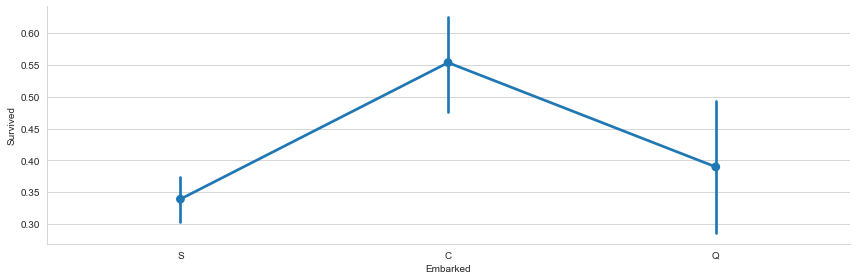

In [19]:
sns.factorplot('Embarked','Survived',data=titanic_df,height=4,aspect=3)   #aspect宽度

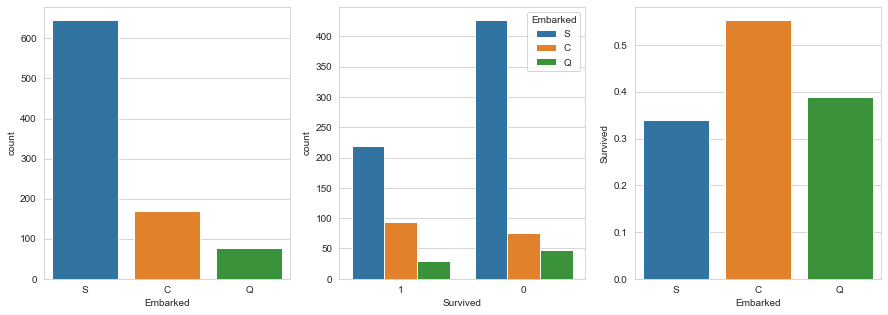

In [21]:
fig,(axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(15,5))

#1.将embarked统计频次
sns.countplot(x='Embarked',data=titanic_df,ax=axis1)

#2.按照是否survived将3中Embarked统计频次
sns.countplot(x='Survived', hue='Embarked', data=titanic_df, order=[1,0], ax=axis2)

#3.在survived里统计三种Embarked的频率
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S', 'C', 'Q'], ax= axis3)

**Fare**

In [23]:
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

#get fare for survived & didn't survive passengers
fare_not_survived = titanic_df['Fare'][titanic_df['Survived'] == 0]
fare_survived = titanic_df['Fare'][titanic_df['Survived'] == 1]

average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

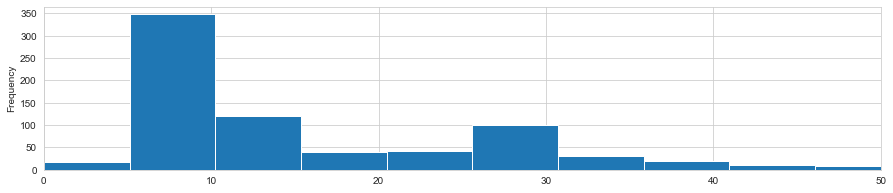

In [24]:
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

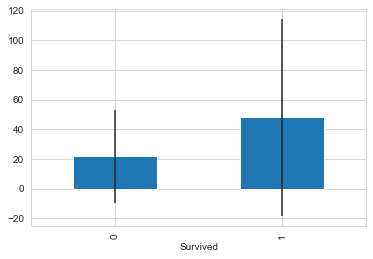

In [25]:
average_fare.index.names = std_fare.index.names = ['Survived']
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

**Age**

C:\Users\FuYuf\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


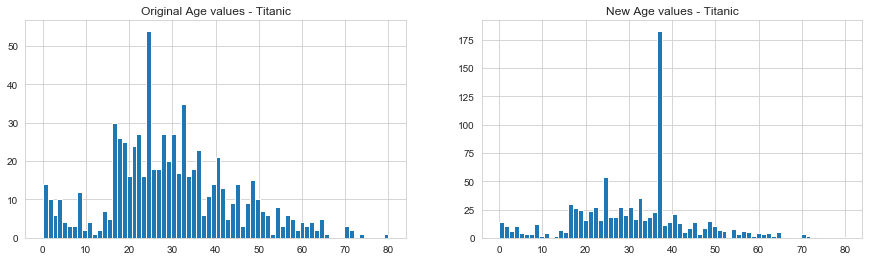

In [34]:
# 首先确定有连个子图
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# 图1 的 title
axis1.set_title('Original Age values - Titanic')
# 图2 的 title
axis2.set_title('New Age values - Titanic')

# 用原始年龄数据画图
# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# 对年龄进行数据处理
# fill NaN values in Age column with random values generated
# 用随机数据填充确实年龄信息
titanic_df["Age"][np.isnan(titanic_df["Age"])] = random.randint(1,100)  #rand_1

# convert from float to int
# 对数据进行 整数处理
titanic_df['Age'] = titanic_df['Age'].astype(int)
        
# plot new Age Values
# 画新图
titanic_df['Age'].hist(bins=70, ax=axis2)

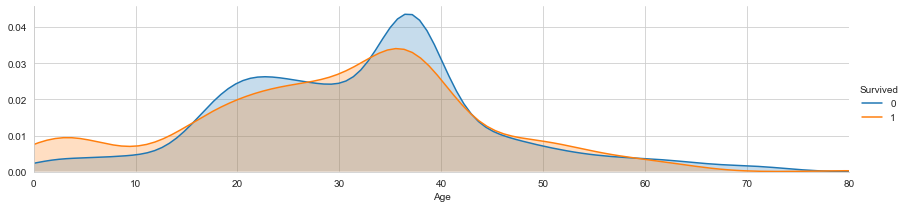

In [35]:
# .... continue with plot Age column

# 继续画一张曲线图，按照survived分开画
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

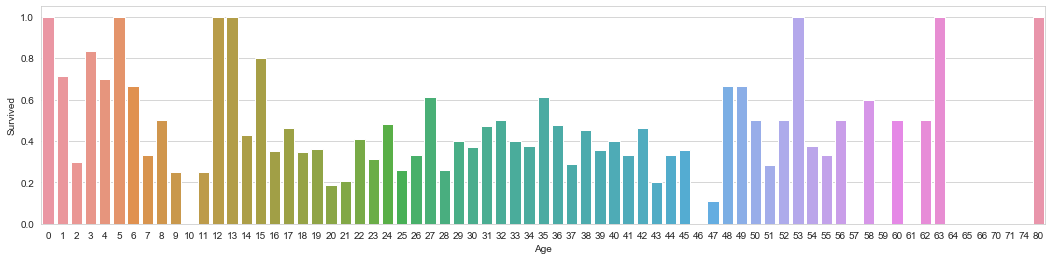

In [36]:
# 根据年龄统计存活的平均人数
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [37]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)

接下来研究下 Family 这个变量数据，看看存活率跟是否一家出行有多大的关系。这个Family的变量是根据Parch & SibSp这两个变量统计出来的。如果Parch & SibSp不为0，代表乘客是和家里人一起出行的。

In [38]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

C:\Users\FuYuf\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

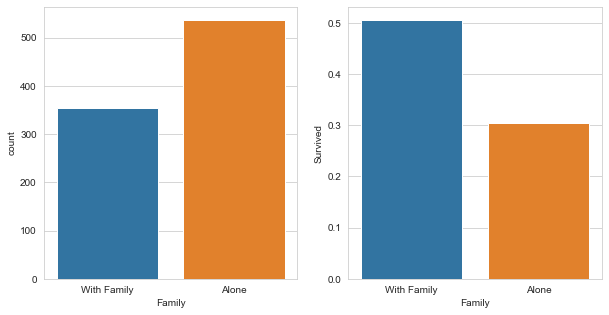

In [39]:
# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

接下来研究下 Sex 这个变量数据，看看存活率跟性别有多大的关系。首先按照是否满16岁，将人群分为是否为"成人"，再分男人和女人。

In [40]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)

In [41]:
# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

画两张图：

1. 按性别、成人统计人数
2. 按性别和成人与否统计存活率

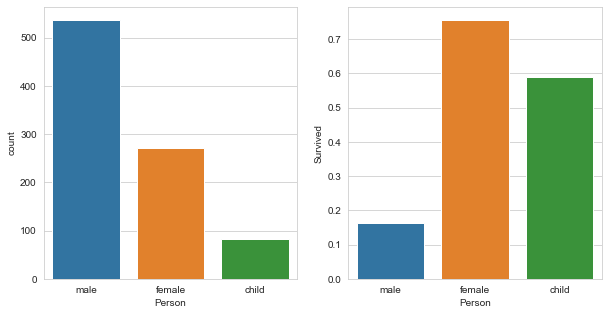

In [43]:
titanic_df = titanic_df.join(person_dummies_titanic)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

接下来研究下 Pclass 这个变量数据，画个存活率的统计概率：

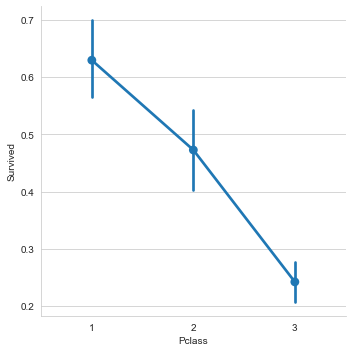

In [44]:

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

In [1]:
import numpy as np
print(np.identity(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
